# Final Project for CAP6307
## Cat Baker and Darshay Blount
### Fall 2020

In [1]:
# install modules
!pip install lyricsgenius
!pip install textblob
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /Users/catbaker3/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /Users/catbaker3/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/catbaker3/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/catbaker3/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     /Users/catbaker3/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/catbaker3/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [2]:
# import packages
from gensim.summarization import keywords
import spacy
import nltk
from nltk.corpus import stopwords
import pandas as pd
import lyricsgenius
import textblob
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# download spacy and import English
nltk.download('stopwords')
from spacy.lang.en import English

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/catbaker3/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Import stopwords
stopwords = set(stopwords.words('english'))

In [4]:
# Set the nlp language to English
nlp = English()
nlp.max_length = 10000000

In [5]:
# Set up the token, id, and secret for the Lyric Genius API
client_id = 'jGXOq14YmSS490yTKQ7CPzu8l7ui5v4JnbBvhIhQV8VV74cSTpoFEqoKo5NqRuTT'
client_secret = 'MCDsDPsZLCO10I9_cAOVZp91OAIFgx-aUDmaZ79hHQ9jgnquVkDROF1NBjlIisu9X2yG86OrGz7nJF26VB5nQw'
access_token = 'vcwFJvy8po5FLkEkeTeSbhkbfidq43zZqTxoBNLnEbL7tltCTbDRiVeLJ68AL2rG'

In [6]:
# Set up the API information
genius = lyricsgenius.Genius(access_token)

In [7]:
# Import the Billboard Top 100 dataset
billboard_100 = pd.read_csv('billboardHot100_1999-2019.csv')

In [8]:
# Preview the dataframe
billboard_100.head(10)

,Unnamed: 0,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,Features
0,1,"Lil Nas,",Old Town Road,1,1.0,7.0,2019-07-06,"April 5, 2019","Country,Atlanta,Alternative Country,Hip-Hop,Tr...","Jozzy, Atticus ross, Trent reznor, Billy ray c...","Old Town Road Remix \nOh, oh-oh\nOh\nYeah, I'm...",Billy Ray Cyrus
1,2,"Shawn Mendes, Camila Cabello",Senorita,2,NaN,NaN,2019-07-06,"June 21, 2019",Pop,"Cashmere cat, Jack patterson, Charli xcx, Benn...",Senorita \nI love it when you call me senorita...,NaN
2,3,Billie Eilish,Bad Guy,3,2.0,13.0,2019-07-06,"March 29, 2019","Hip-Hop,Dark Pop,House,Trap,Memes,Alternative ...","Billie eilish, Finneas","bad guy \nWhite shirt now red, my bloody nose\...",NaN
3,4,Khalid,Talk,4,3.0,20.0,2019-07-06,"February 7, 2019","Synth-Pop,Pop","Howard lawrence, Guy lawrence, Khalid",Talk \nCan we just talk? Can we just talk?\nTa...,NaN
4,5,"Ed Sheeran, Justin Bieber",I Don't Care,5,2.0,7.0,2019-07-06,"May 10, 2019","Canada,UK,Dance,Dance-Pop,Pop","Ed sheeran, Justin bieber, Shellback, Max mart...",I Don't Care \nI'm at a party I don't wanna be...,NaN
5,6,Jonas Brothers,Sucker,6,1.0,17.0,2019-07-06,"March 1, 2019","Alternative Pop,Boy Band,Teen Pop,Pop-Rock,Pop","Ryan tedder, Louis bell, Frank dukes, Nick jon...",Sucker \nWe go together\nBetter than birds of ...,NaN
6,7,DaBaby,Suge,7,7.0,13.0,2019-07-06,"March 1, 2019","Trap,East Coast,Rap","Jetsonmade, Pooh beatz, Dababy","Suge \nPooh, you a fool for this one\nHa\nOh L...",NaN
7,8,Drake,Money In The Grave,8,7.0,2.0,2019-07-06,"June 15, 2019","Hip-Hop,Rap,Basketball,NBA,Canada","Asoteric, Ljay currie, Cydney christine, Rick ...","Money in the Grave \nYeah, okay\nLil CC on the...",Rick Ross
8,9,Chris Brown,No Guidance,9,9.0,3.0,2019-07-06,"June 8, 2019","Alternative R&;B,Hip-Hop,Rap,Pop,DMV,Canada,R&;B","Velous, J louis, Vinylz, Michee patrick lebrun...","No Guidance \nBefore I die I'm tryna fuck you,...",Drake
9,10,Post Malone,Wow.,10,2.0,27.0,2019-07-06,"December 24, 2018","Memes,Hip-Hop,Trap,Rap","Frank dukes, Billy walsh, Louis bell, Post malone","Wow \nSaid she tired of little money, need a b...",NaN


In [9]:
# Sort the dataframe by week ID (ascending)
billboard_100 = billboard_100.sort_values(by=['Week'])

In [10]:
billboard_100.head()

,Unnamed: 0,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,Features
97224,97225,The Offspring,Why Don't You Get A Job?,100,74.0,15.0,1999-07-12,NaN,"Ska,Punk Rock,Rock",Dexter holland,Why Don't You Get a Job? \nMy friend's got a g...,NaN
97157,97158,Sugar Ray,Every Morning,27,3.0,28.0,1999-07-12,NaN,Rock,"David kahne, Sugar ray",Every Morning \nEvery morning there's a halo h...,NaN
97158,97159,Goo Goo Dolls,Slide,28,8.0,33.0,1999-07-12,NaN,"Alternative Rock,Rock",John rzeznik,Slide \nCould you whisper in my ear?\nThe thin...,NaN
97159,97160,Lonestar,Amazed,29,29.0,7.0,1999-07-12,NaN,"Pop,Country","Marv green, Chris lindsey, Aimee mayo",Amazed \nEvery time our eyes meet\nThis feelin...,NaN
97160,97161,Tim McGraw,Please Remember Me,30,10.0,16.0,1999-07-12,NaN,"Country,Rock","Will jennings, Rodney crowell",Please Remember Me \nWhen all our tears have r...,NaN


In [11]:
# Check for null values
billboard_100.isnull().sum()

# This makes since bc the null values belong to the song's first week on the Billboard chart

Unnamed: 0             0
Artists                0
Name                   0
Weekly.rank            0
Peak.position       7069
Weeks.on.chart      7069
Week                   0
Date               12247
Genre                  0
Writing.Credits     7213
Lyrics                 0
Features           75936
dtype: int64

In [16]:
# Filter to only show songs from the last ten years (November 2010-Dec 2019 (end of dataset))
billboard_100 = billboard_100.loc[billboard_100['Week'] > '2009-07-01']

In [17]:
billboard_100.head()

,Unnamed: 0,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,Features
49402,49403,Dierks Bentley,Sideways,35,35.0,12.0,2009-07-02,"February 3, 2009",Country,"Dierks bentley, Jim beavers","Sideways \nHey girl, what's your name?\nIt's s...",NaN
49401,49402,Flo Rida,Sugar,34,5.0,14.0,2009-07-02,"March 31, 2009",Rap,"Steven battey, Carlos battey, Dj montay, Flo r...",Sugar \nDumm\nDouble dee double di\nDouble dee...,Wynter
49400,49401,Jason Mraz,I'm Yours,33,6.0,62.0,2009-07-02,"April 15, 2008","Adult Contemporary,Adult Alternative,Pop-Rock,...",Jason mraz,I'm Yours \nWell you done done me and you bet ...,NaN
49395,49396,Brad Paisley,Then,28,28.0,14.0,2009-07-02,"March 23, 2009",Country,"Ashley gorley, Brad paisley, Chris dubois",Then \nI remember trying not to stare\nThe nig...,NaN
49398,49399,Jordin Sparks,Battlefield,31,31.0,6.0,2009-07-02,"May 8, 2009","R&;B,Pop","Wayne wilkins, Sam watters, Louis biancaniello...","Battlefield \nDon't try to explain your mind, ...",NaN


In [27]:
billboard_100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49463 entries, 49402 to 0
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       49463 non-null  int64  
 1   Artists          49463 non-null  object 
 2   Name             49463 non-null  object 
 3   Weekly.rank      49463 non-null  int64  
 4   Peak.position    45402 non-null  float64
 5   Weeks.on.chart   45402 non-null  float64
 6   Week             49463 non-null  object 
 7   Date             47597 non-null  object 
 8   Genre            49463 non-null  object 
 9   Writing.Credits  47974 non-null  object 
 10  Lyrics           49463 non-null  object 
 11  Features         12949 non-null  object 
 12  Song_Artist      49463 non-null  object 
 13  Artist_Song      49463 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 5.7+ MB


In [29]:
# Create a unique identifier column 



<ipython-input-29-0418d80991d7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  billboard_100['Artist_Song'] = str(billboard_100['Artists'] + billboard_100['Name'])


In [31]:
# Drop duplicate songs
billboard_100.drop_duplicates() #remove duplicate occurrences of songs

,Unnamed: 0,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,Features,Song_Artist,Artist_Song
49402,49403,Dierks Bentley,Sideways,35,35.0,12.0,2009-07-02,"February 3, 2009",Country,"Dierks bentley, Jim beavers","Sideways \nHey girl, what's your name?\nIt's s...",NaN,Dierks Bentley Sideways,49402 Dierks BentleySide...
49401,49402,Flo Rida,Sugar,34,5.0,14.0,2009-07-02,"March 31, 2009",Rap,"Steven battey, Carlos battey, Dj montay, Flo r...",Sugar \nDumm\nDouble dee double di\nDouble dee...,Wynter,Flo Rida Sugar,49402 Dierks BentleySide...
49400,49401,Jason Mraz,I'm Yours,33,6.0,62.0,2009-07-02,"April 15, 2008","Adult Contemporary,Adult Alternative,Pop-Rock,...",Jason mraz,I'm Yours \nWell you done done me and you bet ...,NaN,Jason Mraz I'm Yours,49402 Dierks BentleySide...
49395,49396,Brad Paisley,Then,28,28.0,14.0,2009-07-02,"March 23, 2009",Country,"Ashley gorley, Brad paisley, Chris dubois",Then \nI remember trying not to stare\nThe nig...,NaN,Brad Paisley Then,49402 Dierks BentleySide...
49398,49399,Jordin Sparks,Battlefield,31,31.0,6.0,2009-07-02,"May 8, 2009","R&;B,Pop","Wayne wilkins, Sam watters, Louis biancaniello...","Battlefield \nDon't try to explain your mind, ...",NaN,Jordin Sparks Battlefield,49402 Dierks BentleySide...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,71,Lil Baby,Out The Mud,72,NaN,NaN,2019-07-06,"June 21, 2019","Atlanta,Trap,Rap","Lil baby, Future","Out the Mud \nCook that shit up, Quay\nLil Bab...",Future,Lil Baby Out The Mud,49402 Dierks BentleySide...
71,72,"The Chainsmokers, Bebe Rexha",Call You Mine,73,67.0,4.0,2019-07-06,"May 31, 2019","Electronic Pop,EDM,Electro House,Electro,Elect...","Alex pall, Tony ann, Andrew taggart, Watt, Ali...",Call You Mine \nTwo kids with their hearts on ...,NaN,"The Chainsmokers, Bebe Rexha Call You Mine",49402 Dierks BentleySide...
72,73,"Summer Walker, Drake",Girls Need Love,74,37.0,18.0,2019-07-06,"February 27, 2019","Atlanta,Canada,Remix,R&;B","Arsenio archer, Drake, Summer walker","Girls Need Love Remix \nHonestly\nHonestly, I'...",NaN,"Summer Walker, Drake Girls Need Love",49402 Dierks BentleySide...
62,63,5 Seconds Of Summer,Easier,64,48.0,5.0,2019-07-06,"May 23, 2019","Australia,Pop","Watt, Ali tamposi, Louis bell, Charlie puth, M...",Easier \nIs it easier to stay? Is it easier to...,NaN,5 Seconds Of Summer Easier,49402 Dierks BentleySide...


In [33]:
billboard_100.shape

(49463, 14)

## Exploratory Data Analysis

In [35]:
# Distribution of instances
#max_instances = billboard_100.groupby('Name')['Instance'].max().reset_index()
#max_instances['Instance'].value_counts()

KeyError: 'Column not found: Instance'

In [ ]:
# Plot the distribution
plt.figure(figsize=(10,7))
sns.countplot(max_instances['Instance'])
plt.title('Distribution of the Number of Instances')
plt.xlabel('Number of Instances')
plt.ylabel('Number of Songs')

In [38]:
# Distribution of weeks on the Billboard chart
max_weeks = billboard_100.groupby('Name')['Weeks.on.chart'].max().reset_index()
max_weeks['Weeks.on.chart'].value_counts()

20.0    564
2.0     287
3.0     169
4.0     107
18.0    106
       ... 
76.0      1
79.0      1
60.0      1
65.0      1
87.0      1
Name: Weeks.on.chart, Length: 65, dtype: int64

Text(0, 0.5, 'Number of Songs')

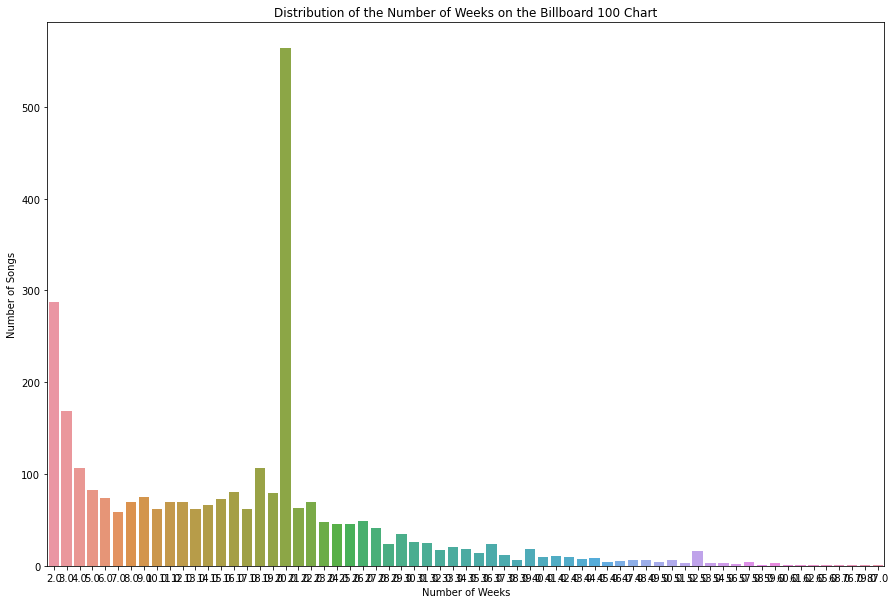

In [40]:
# Plot the distribution
plt.figure(figsize=(15,10))
sns.countplot(max_weeks['Weeks.on.chart'])
plt.title('Distribution of the Number of Weeks on the Billboard 100 Chart')
plt.xlabel('Number of Weeks')
plt.ylabel('Number of Songs')

In [42]:
# Look at the songs with the longest time on the charts
max_weeks.loc[max_weeks['Weeks.on.chart'] >= 55].sort_values(by = 'Weeks.on.chart', ascending=False)

,Name,Weeks.on.chart
2680,Radioactive,87.0
2838,Sail,79.0
1662,I'm Yours,76.0
703,Counting Stars,68.0
2791,Rolling In The Deep,65.0
1437,Ho Hey,62.0
792,Demons,61.0
2283,Need You Now,60.0
144,All Of Me,59.0
3026,Somebody That I Used To Know,59.0


In [43]:
peak_position = billboard_100.groupby('Name')['Peak.position'].max().reset_index()
peak_position['Peak.position'].value_counts()

91.0     87
88.0     75
90.0     71
87.0     66
84.0     64
         ..
29.0     11
49.0     11
32.0     10
40.0      9
100.0     9
Name: Peak.position, Length: 100, dtype: int64

In [ ]:
# Import the Billboard Top 100 audio features Dataset
#billboard_100_audio = pd.read_excel('billboard_100_audio.xlsx')

In [ ]:
# Remove duplicate songs
#billboard_100_audio.drop_duplicates(subset='SongID', inplace=True)
#billboard_100_audio.reset_index()

## Lyrics and Sentiment Analysis

In [44]:
# Get the column names 
billboard_100.columns.tolist()

['Unnamed: 0',
 'Artists',
 'Name',
 'Weekly.rank',
 'Peak.position',
 'Weeks.on.chart',
 'Week',
 'Date',
 'Genre',
 'Writing.Credits',
 'Lyrics',
 'Features',
 'Song_Artist',
 'Artist_Song']

In [46]:
# more column names
#billboard_100_audio.columns.tolist()

In [49]:
# Function to return the lyrics to each song
def get_lyrics(song, artist):
    try: 
        return genius.search_song(song, artist).lyrics
    except:
        return 'lyrics not found'

In [ ]:
# Function to return the sentiment score for each song
def lyrics_sentiment(lyrics):    
    analysis = TextBlob(lyrics)
    return analysis.sentiment.polarity

In [ ]:
# Text preprocessing
def preprocessing(text):
    document = nlp(text, disable=['ner','parser'])
    lemmas = [token.lemma_ for token in document]
    lemma_clean = [lemma for lemma in lemmas
                  if lemma.isalpha() and lemma not in stopwords]
    return ''.join(lemma_clean)

In [ ]:
# Apply the function to get the lyrics
lyrics = billboard_100.apply(lambda row: get_lyrics(row['Name'], row['Artists']), axis=1)
billboard_100['Lyrics'] = lyrics
billboard_100 = billboard_100.drop(billboard_100[billboard_100['Lyrics'] == 'not found'].index) #drop rows where lyrics are not found on Genius

Searching for "Sideways" by Dierks Bentley...
Done.
Searching for "Sugar" by Flo Rida...
Done.
Searching for "I'm Yours" by Jason Mraz...
Done.
Searching for "Then" by Brad Paisley...
Done.
Searching for "Battlefield" by Jordin Sparks...
Done.
Searching for "New Divide" by Linkin Park...
Done.
Searching for "Love Story" by Taylor Swift...
Done.
Searching for "You're A Jerk" by New Boyz...
Done.
Searching for "Just Dance" by Lady Gaga...
Done.
Searching for "Kiss A Girl" by Keith Urban...
Done.
Searching for "People Are Crazy" by Billy Currington...
Done.
Searching for "Gives You Hell" by The All...
Done.
Searching for "Her Diamonds" by Rob Thomas...
Done.
Searching for "All The Above" by Maino...
Done.
Searching for "Ego" by Beyonce...
Done.
Searching for "No Surprise" by Daughtry...
Done.
Searching for "Best Days Of Your Life" by Kellie Pickler...
Done.
Searching for "Kiss Me Thru The Phone" by Soulja Boy Tell 'em...
Done.
Searching for "You Found Me" by The Fray...
Done.
Searching fo

Done.
Searching for "Throw It In The Bag" by Fabolous...
Done.
Searching for "One In Every Crowd" by Montgomery Gentry...
Done.
Searching for "Make Her Say" by Kid Cudi...
Done.
Searching for "Love Your Love The Most" by Eric Church...
Done.
Searching for "Walkin' On The Moon" by The...
Done.
Searching for "Funny The Way It Is" by Dave Matthews Band...
Done.
Searching for "Ain't No Rest For The Wicked" by Cage The Elephant...
Done.
Searching for "Sound Of Madness" by Shinedown...
Done.
Searching for "When Love Takes Over" by David Guetta...
Done.
Searching for "Echo" by Gorilla Zoe...
Done.
Searching for "Barefoot And Crazy" by Jack Ingram...
Done.
Searching for "Here We Go Again" by Demi Lovato...
Done.
Searching for "Beautiful" by Eminem...
Done.
Searching for "Show Me What I'm Looking For" by Carolina Liar...
Done.
Searching for "Wanted" by Jessie James...
Done.
Searching for "It's America" by Rodney Atkins...
Done.
Searching for "Sissy's Song" by Alan Jackson...
Done.
Searching for

Done.
Searching for "Fallin' For You" by Colbie Caillat...
Done.
Searching for "Good Girls Go Bad" by Cobra Starship...
Done.
Searching for "New Divide" by Linkin Park...
Done.
Searching for "Love Drunk" by Boys Like Girls...
Done.
Searching for "Ego" by Beyonce...
Done.
Searching for "Best I Ever Had" by Drake...
Done.
Searching for "Boom Boom Pow" by The Black Eyed Peas...
Done.
Searching for "Knock You Down" by Keri Hilson...
Done.
Searching for "Fire Burning" by Sean Kingston...
Done.
Searching for "You Belong With Me" by Taylor Swift...
Done.
Searching for "LoveGame" by Lady Gaga...
Done.
Searching for "I Know You Want Me" by Pitbull...
Done.
Searching for "Birthday Sex" by Jeremih...
Done.
Searching for "If Today Was Your Last Day" by Nickelback...
Done.
Searching for "He Could Be The One" by Hannah Montana...
Done.
Searching for "Waking Up In Vegas" by Katy Perry...
Done.
Searching for "Don't Trust Me" by 3OH!3...
Done.
Searching for "Halo" by Beyonce...
Done.
Searching for "Eve

Done.
Searching for "Sideways" by Dierks Bentley...
Done.
Searching for "Goodbye" by Kristinia DeBarge...
Done.
Searching for "So Fine" by Sean Paul...
Done.
Searching for "I'm In Miami Trick" by LMFAO...
No results found for: 'I'm In Miami Trick LMFAO'
Searching for "When Love Takes Over" by David Guetta...
Done.
Searching for "Fallin' For You" by Colbie Caillat...
Done.
Searching for "Down" by Jay Sean...
Done.
Searching for "I Need A Girl" by Trey Songz...
Done.
Searching for "Boots On" by Randy Houser...
Done.
Searching for "Always Strapped" by Birdman...
Done.
Searching for "Last Chance" by Ginuwine...
Done.
Searching for "Throw It In The Bag" by Fabolous...
Done.
Searching for "Wanted" by Jessie James...
Done.
Searching for "Living For The Night" by George Strait...
Done.
Searching for "Wild At Heart" by Gloriana...
Done.
Searching for "Not Meant To Be" by Theory Of A Deadman...
Done.
Searching for "Alright" by Darius Rucker...
Done.
Searching for "Down" by Jay Sean...
Done.
Sear

Done.
Searching for "Birthday Sex" by Jeremih...
Done.
Searching for "Please Don't Leave Me" by P!nk...
Done.
Searching for "New Divide" by Linkin Park...
Done.
Searching for "Don't Trust Me" by 3OH!3...
Done.
Searching for "She Wolf" by Shakira...
Done.
Searching for "The Climb" by Miley Cyrus...
Done.
Searching for "Waking Up In Vegas" by Katy Perry...
Done.
Searching for "Never Say Never" by The Fray...
Done.
Searching for "I Know You Want Me" by Pitbull...
Done.
Searching for "Make Her Say" by Kid Cudi...
Done.
Searching for "Toes" by Zac Brown Band...
Done.
Searching for "Be On You" by Flo Rida...
Done.
Searching for "Barefoot And Crazy" by Jack Ingram...
Done.
Searching for "When Love Takes Over" by David Guetta...
Done.
Searching for "Always Strapped" by Birdman...
Done.
Searching for "The One" by Mary J. Blige...
Done.
Searching for "Love Your Love The Most" by Eric Church...
Done.
Searching for "Come Back To Me" by David Cook...
Done.
Searching for "Run This Town" by Jay...
Do

Searching for "Her Diamonds" by Rob Thomas...
Searching for "Ice Cream Paint Job" by Dorrough...
Searching for "Halo" by Beyonce...
Searching for "Wetter" by Twista...
Searching for "Poker Face" by Lady Gaga...
Searching for "Wanted" by Jessie James...
Searching for "People Are Crazy" by Billy Currington...
Searching for "Pretty Wings" by Maxwell...
Searching for "Summer Nights" by Rascal Flatts...
Searching for "Never Say Never" by The Fray...
Searching for "If Today Was Your Last Day" by Nickelback...
Searching for "You Found Me" by The Fray...
Searching for "Make Her Say" by Kid Cudi...
Searching for "Second Chance" by Shinedown...
Searching for "Birthday Sex" by Jeremih...
Searching for "Battlefield" by Jordin Sparks...
Searching for "Please Don't Leave Me" by P!nk...
Searching for "Use Somebody" by Kings Of Leon...
Searching for "Best I Ever Had" by Drake...
Searching for "Down" by Jay Sean...
Searching for "Knock You Down" by Keri Hilson...
Searching for "Good Girls Go Bad" by Co

No results found for: 'I'm In Miami Trick LMFAO'
Searching for "Boots On" by Randy Houser...
Searching for "Evacuate The Dancefloor" by Cascada...
Searching for "Ego" by Beyonce...
Searching for "Wetter" by Twista...
Searching for "Only You Can Love Me This Way" by Keith Urban...
Searching for "Living For The Night" by George Strait...
Searching for "Small Town USA" by Justin Moore...
Searching for "It's A Business Doing Pleasure With You" by Tim McGraw...
Searching for "Already Gone" by Kelly Clarkson...
Searching for "Wanted" by Jessie James...
Searching for "She Is Love" by Parachute...
Searching for "Last Chance" by Ginuwine...
Searching for "Wild At Heart" by Gloriana...
Searching for "Barefoot And Crazy" by Jack Ingram...
Searching for "Love Your Love The Most" by Eric Church...
Searching for "Not Meant To Be" by Theory Of A Deadman...
Searching for "Successful" by Drake...
Searching for "Pretty Wings" by Maxwell...
Searching for "Her Diamonds" by Rob Thomas...
Searching for "One

Searching for "The Fixer" by Pearl Jam...
Searching for "Do I" by Luke Bryan...
Searching for "Number One" by R. Kelly...
Searching for "Joey" by Sugarland...
Searching for "Come Back To Me" by David Cook...
Searching for "Sounds Like Life To Me" by Darryl Worley...
Searching for "Wild At Heart" by Gloriana...
Searching for "Starstrukk" by 3OH!3...
Searching for "Wasted" by Gucci Mane...
Searching for "I Need A Girl" by Trey Songz...
Searching for "Falling Down" by Selena Gomez, The Scene...
Searching for "Face Drop" by Sean Kingston...
Searching for "Closer To Love" by Mat Kearney...
Searching for "Million Dollar Bill" by Whitney Houston...
Searching for "Second Chance" by Shinedown...
Searching for "I'll Just Hold On" by Blake Shelton...
Searching for "Replay" by Iyaz...
Searching for "Under" by Pleasure P...
Searching for "Shake My" by Three 6 Mafia...
Searching for "God In Me" by Mary Mary...
Searching for "Successful" by Drake...
Searching for "You're A Jerk" by New Boyz...
Search

Searching for "Obsessed" by Mariah Carey...
Searching for "Hotel Room Service" by Pitbull...
Searching for "Evacuate The Dancefloor" by Cascada...
Searching for "Best I Ever Had" by Drake...
Searching for "Knock You Down" by Keri Hilson...
Searching for "Good Girls Go Bad" by Cobra Starship...
Searching for "Successful" by Drake...
Searching for "Sweet Dreams" by Beyonce...
Searching for "Throw It In The Bag" by Fabolous...
Searching for "Break Up" by Mario...
Searching for "Battlefield" by Jordin Sparks...
Searching for "Be On You" by Flo Rida...
Searching for "Smile" by Uncle Kracker...
Searching for "Fallin' For You" by Colbie Caillat...
Searching for "Happy" by Leona Lewis...
Searching for "Every Girl" by Young Money...
Searching for "Boots On" by Randy Houser...
Searching for "I'm In Miami Trick" by LMFAO...
No results found for: 'I'm In Miami Trick LMFAO'
Searching for "Summer Nights" by Rascal Flatts...
Searching for "I Look To You" by Whitney Houston...
Searching for "Under" by

Searching for "No Surprise" by Daughtry...
Searching for "Evacuate The Dancefloor" by Cascada...
Searching for "21 Guns" by Green Day...
Searching for "I Know You Want Me" by Pitbull...
Searching for "Only You Can Love Me This Way" by Keith Urban...
Searching for "One Time" by Justin Bieber...
Searching for "Never Say Never" by The Fray...
Searching for "Knock You Down" by Keri Hilson...
Searching for "Forever" by Drake...
Searching for "Already Gone" by Kelly Clarkson...
Searching for "Waking Up In Vegas" by Katy Perry...
Searching for "Party In The U.S.A." by Miley Cyrus...
Searching for "Run This Town" by Jay...
Searching for "Whatcha Say" by Jason Derulo...
Searching for "I Gotta Feeling" by The Black Eyed Peas...
Specified song does not contain lyrics. Rejecting.
Searching for "Paparazzi" by Lady Gaga...
Searching for "You Belong With Me" by Taylor Swift...
Searching for "Obsessed" by Mariah Carey...
Searching for "Use Somebody" by Kings Of Leon...
Searching for "Empire State Of M

Searching for "God In Me" by Mary Mary...
Searching for "Uprising" by Muse...
Searching for "Body Language" by Jesse McCartney...
Searching for "Starstrukk" by 3OH!3...
Searching for "I Will Not Bow" by Breaking Benjamin...
Searching for "Small Town USA" by Justin Moore...
Searching for "She Wolf" by Shakira...
Searching for "Evacuate The Dancefloor" by Cascada...
Searching for "Throw It In The Bag" by Fabolous...
Searching for "Fallin' For You" by Colbie Caillat...
Searching for "Love Drunk" by Boys Like Girls...
Searching for "I Can Transform Ya" by Chris Brown...
Searching for "Toes" by Zac Brown Band...
Searching for "Hotel Room Service" by Pitbull...
Searching for "Gettin' You Home" by Chris Young...
Searching for "Drop It Low" by Ester Dean...
Searching for "Good Girls Go Bad" by Cobra Starship...
Searching for "Successful" by Drake...
Searching for "Be On You" by Flo Rida...
Searching for "Knock You Down" by Keri Hilson...
Searching for "Good Morning" by Chamillionaire...
Search

Searching for "God In Me" by Mary Mary...
Searching for "Time For Miracles" by Adam Lambert...
Searching for "Never Say Never" by The Fray...
Searching for "American Ride" by Toby Keith...
Searching for "Body Language" by Jesse McCartney...
Searching for "Funhouse" by P!nk...
Searching for "Gangsta Luv" by Snoop Dogg...
Searching for "Smile" by Uncle Kracker...
Searching for "Be On You" by Flo Rida...
Searching for "Doesn't Mean Anything" by Alicia Keys...
Searching for "Hey, Soul Sister" by Train...
Searching for "Fifteen" by Taylor Swift...
Searching for "Good Morning" by Chamillionaire...
Searching for "Money To Blow" by Birdman...
Searching for "Face Drop" by Sean Kingston...
Searching for "Runaway" by Love And Theft...
Searching for "Uprising" by Muse...
Searching for "Consider Me Gone" by Reba...
Searching for "All The Right Moves" by OneRepublic...
Searching for "Number One" by R. Kelly...
Searching for "Starstrukk" by 3OH!3...
Searching for "Southern Voice" by Tim McGraw...
Sea

Searching for "God In Me" by Mary Mary...
Searching for "Ain't No Rest For The Wicked" by Cage The Elephant...
Searching for "History In The Making" by Darius Rucker...
Searching for "The Truth" by Jason Aldean...
Searching for "Live Like We're Dying" by Kris Allen...
Searching for "Someday" by Rob Thomas...
Searching for "The Other Side Of The Door" by Taylor Swift...
Searching for "Eight Second Ride" by Jake Owen...
Searching for "Never Gonna Be Alone" by Nickelback...
Searching for "Spotlight" by Gucci Mane...
Searching for "Runaway" by Love And Theft...
Searching for "Defying Gravity" by Glee Cast...
Searching for "Haven't Met You Yet" by Michael Buble...
Searching for "One Less Lonely Girl" by Justin Bieber...
Searching for "Only You Can Love Me This Way" by Keith Urban...
Searching for "Successful" by Drake...
Searching for "Smile" by Uncle Kracker...
Searching for "Drop It Low" by Ester Dean...
Searching for "Gangsta Luv" by Snoop Dogg...
Searching for "If You Only Knew" by Shin

Searching for "You Belong With Me" by Taylor Swift...
Searching for "Already Gone" by Kelly Clarkson...
Searching for "Forever" by Drake...
Searching for "I Gotta Feeling" by The Black Eyed Peas...
Specified song does not contain lyrics. Rejecting.
Searching for "Russian Roulette" by Rihanna...
Searching for "Run This Town" by Jay...
Searching for "Use Somebody" by Kings Of Leon...
Searching for "I Can Transform Ya" by Chris Brown...
Searching for "One Time" by Justin Bieber...
Searching for "Empire State Of Mind" by Jay...
Searching for "Lean On Me" by Glee Cast...
Searching for "Southern Voice" by Tim McGraw...
Searching for "Hard" by Rihanna...
Searching for "I Will Not Bow" by Breaking Benjamin...
Searching for "Someday" by Rob Thomas...
Searching for "Eight Second Ride" by Jake Owen...
Searching for "5 Star" by Yo Gotti...
Searching for "Only You Can Love Me This Way" by Keith Urban...
Searching for "Never Gonna Be Alone" by Nickelback...
Searching for "Welcome To The Future" by B

Searching for "I Invented Sex" by Trey Songz...
Searching for "Live Like We're Dying" by Kris Allen...
Searching for "Hey, Soul Sister" by Train...
Searching for "White Liar" by Miranda Lambert...
Searching for "Money To Blow" by Birdman...
Searching for "Tie Me Down" by New Boyz...
Searching for "Evacuate The Dancefloor" by Cascada...
Searching for "The Truth" by Jason Aldean...
Searching for "Fifteen" by Taylor Swift...
Searching for "Empire State Of Mind" by Jay...
Searching for "Bad Romance" by Lady Gaga...
Searching for "TiK ToK" by Ke$ha...
Searching for "Replay" by Iyaz...
Searching for "Fireflies" by Owl City...
Searching for "Whatcha Say" by Jason Derulo...
Searching for "Sexy Chick" by David Guetta...
Searching for "Meet Me Halfway" by The Black Eyed Peas...
Searching for "3" by Britney Spears...
Searching for "Down" by Jay Sean...
Searching for "Paparazzi" by Lady Gaga...
Searching for "Sweet Dreams" by Beyonce...
Searching for "Already Gone" by Kelly Clarkson...
Searching f

Searching for "Smile" by Uncle Kracker...
Searching for "Life After You" by Daughtry...
Searching for "Bonfire" by Craig Morgan...
Searching for "Uprising" by Muse...
Searching for "I Am" by Mary J. Blige...
Searching for "Wasted" by Gucci Mane...
Searching for "Body Language" by Jesse McCartney...
Searching for "History In The Making" by Darius Rucker...
Searching for "You Can't Always Get What You Want" by Glee Cast...
Searching for "This Is War" by Thirty Seconds To Mars...
Searching for "In My Head" by Jason Derulo...
Searching for "One Less Lonely Girl" by Justin Bieber...
Searching for "Live Like We're Dying" by Kris Allen...
Searching for "Hey, Soul Sister" by Train...
Searching for "Tie Me Down" by New Boyz...
Searching for "Money To Blow" by Birdman...
Searching for "Hell Breaks Loose" by Eminem...
Searching for "Evacuate The Dancefloor" by Cascada...
Searching for "Try Sleeping With A Broken Heart" by Alicia Keys...
Searching for "Fifteen" by Taylor Swift...
Searching for "Sa

Searching for "Heartbreak Warfare" by John Mayer...
Searching for "Sex Therapy" by Robin Thicke...
Searching for "Bonfire" by Craig Morgan...
Searching for "Shots" by LMFAO...
Searching for "American Honey" by Lady Antebellum...
Searching for "Video Phone" by Beyonce...
Searching for "Halfway Gone" by Lifehouse...
Searching for "Kings And Queens" by Thirty Seconds To Mars...
Searching for "1901" by Phoenix...
Searching for "Drop It Low" by Ester Dean...
Searching for "Shut It Down" by Pitbull...
Searching for "I Wanna Make You Close Your Eyes" by Dierks Bentley...
Searching for "Eight Second Ride" by Jake Owen...
Searching for "Crawl" by Chris Brown...
Searching for "The Truth" by Jason Aldean...
Searching for "Try Sleeping With A Broken Heart" by Alicia Keys...
Searching for "All The Right Moves" by OneRepublic...
Searching for "Life After You" by Daughtry...
Searching for "Never Gonna Be Alone" by Nickelback...
Searching for "In My Head" by Jason Derulo...
Searching for "Southern Voi

Searching for "3" by Britney Spears...
Searching for "You Belong With Me" by Taylor Swift...
Searching for "Party In The U.S.A." by Miley Cyrus...
Searching for "Forever" by Drake...
Searching for "Need You Now" by Lady Antebellum...
Searching for "Drop The World" by Lil Wayne...
Searching for "Meet Me Halfway" by The Black Eyed Peas...
Searching for "Paparazzi" by Lady Gaga...
Searching for "Whatcha Say" by Jason Derulo...
Searching for "Try Sleeping With A Broken Heart" by Alicia Keys...
Searching for "If You Only Knew" by Shinedown...
Searching for "White Liar" by Miranda Lambert...
Searching for "Someday" by Rob Thomas...
Searching for "Halfway Gone" by Lifehouse...
Searching for "I Will Not Bow" by Breaking Benjamin...
Searching for "Papers" by Usher...
Searching for "Red Light" by David Nail...
Searching for "Shots" by LMFAO...
Searching for "1901" by Phoenix...
Searching for "Take It Off" by Ke$ha...
Searching for "Sex Therapy" by Robin Thicke...
Searching for "American Saturday

Searching for "Sweet Dreams" by Beyonce...
Searching for "Fifteen" by Taylor Swift...
Searching for "Haven't Met You Yet" by Michael Buble...
Searching for "If You Only Knew" by Shinedown...
Searching for "The Truth" by Jason Aldean...
Searching for "Money To Blow" by Birdman...
Searching for "Try Sleeping With A Broken Heart" by Alicia Keys...
Searching for "Fallin' For You" by Colbie Caillat...
Searching for "Live Like We're Dying" by Kris Allen...
Searching for "Whataya Want From Me" by Adam Lambert...
Searching for "Whatcha Say" by Jason Derulo...
Searching for "Fireflies" by Owl City...
Searching for "Down" by Jay Sean...
Searching for "Hallelujah" by Justin Timberlake, Matt Morris...
Searching for "TiK ToK" by Ke$ha...
Searching for "Today Was A Fairytale" by Taylor Swift...
Searching for "Bad Romance" by Lady Gaga...
Searching for "BedRock" by Young Money...
Searching for "Baby" by Justin Bieber...
Searching for "Replay" by Iyaz...
Searching for "Sexy Chick" by David Guetta...
S

Searching for "On To The Next One" by Jay...
Searching for "Gangsta Luv" by Snoop Dogg...
Searching for "I Am" by Mary J. Blige...
Searching for "Cowboy Casanova" by Carrie Underwood...
Searching for "Heartbreak Warfare" by John Mayer...
Searching for "Southern Voice" by Tim McGraw...
Searching for "I Invented Sex" by Trey Songz...
Searching for "Hillbilly Bone" by Blake Shelton...
Searching for "American Saturday Night" by Brad Paisley...
Searching for "Never Gonna Be Alone" by Nickelback...
Searching for "Shots" by LMFAO...
Searching for "Temporary Home" by Carrie Underwood...
Searching for "Set The Fire To The Third Bar" by Snow Patrol...
Searching for "Breathless" by Taylor Swift...
Searching for "History In The Making" by Darius Rucker...
Searching for "Sex Therapy" by Robin Thicke...
Searching for "Paparazzi" by Lady Gaga...
Searching for "Meet Me Halfway" by The Black Eyed Peas...
Searching for "Whatcha Say" by Jason Derulo...
Searching for "Forever" by Drake...
Searching for "T

Searching for "Lemonade" by Gucci Mane...
Searching for "Everything To Me" by Monica...
Searching for "A Little More Country Than That" by Easton Corbin...
Searching for "Glitter In The Air" by P!nk...
Searching for "All The Way Turnt Up" by Roscoe Dash...
Searching for "Steady Mobbin'" by Young Money...
Searching for "I Wanna Make You Close Your Eyes" by Dierks Bentley...
Searching for "I Invented Sex" by Trey Songz...
Searching for "Shots" by LMFAO...
Searching for "Southern Voice" by Tim McGraw...
Searching for "Just Breathe" by Pearl Jam...
Searching for "Unstoppable" by Rascal Flatts...
Searching for "Ain't Leavin Without You" by Jaheim...
Searching for "Your Love Is My Drug" by Ke$ha...
Searching for "O Let's Do It" by Waka Flocka Flame...
Searching for "Spotlight" by Gucci Mane...
Searching for "Fearless" by Taylor Swift...
Searching for "You And Me" by Dave Matthews Band...
Searching for "I Can Transform Ya" by Chris Brown...
Searching for "Beamer, Benz, Or Bentley" by Lloyd Ba

Searching for "How Low" by Ludacris...
Searching for "Rude Boy" by Rihanna...
Searching for "Say Aah" by Trey Songz...
Searching for "In My Head" by Jason Derulo...
Searching for "Blah Blah Blah" by Ke$ha...
Searching for "Telephone" by Lady Gaga...
Searching for "Baby" by Justin Bieber...
Searching for "Sexy Chick" by David Guetta...
Searching for "Carry Out" by Timbaland...
Searching for "Nothin' On You" by B.o.B...
Searching for "According To You" by Orianthi...
Searching for "Live Like We're Dying" by Kris Allen...
Searching for "Breakeven" by The Script...
Searching for "Replay" by Iyaz...
Searching for "I Gotta Feeling" by The Black Eyed Peas...
Specified song does not contain lyrics. Rejecting.
Searching for "Tie Me Down" by New Boyz...
Searching for "Whataya Want From Me" by Adam Lambert...
Searching for "Paparazzi" by Lady Gaga...
Searching for "Temporary Home" by Carrie Underwood...
Searching for "It Kills Me" by Melanie Fiona...
Searching for "I Invented Sex" by Trey Songz..

Searching for "Fireflies" by Owl City...
Searching for "You Belong With Me" by Taylor Swift...
Searching for "Hillbilly Bone" by Blake Shelton...
Searching for "Do You Remember" by Jay Sean...
Searching for "A Little More Country Than That" by Easton Corbin...
Searching for "Temporary Home" by Carrie Underwood...
Searching for "Highway 20 Ride" by Zac Brown Band...
Searching for "Whatcha Say" by Jason Derulo...
Searching for "Replay" by Iyaz...
Searching for "Life After You" by Daughtry...
Searching for "Tie Me Down" by New Boyz...
Searching for "Rude Boy" by Rihanna...
Searching for "Whataya Want From Me" by Adam Lambert...
Searching for "Two Is Better Than One" by Boys Like Girls...
Searching for "Need You Now" by Lady Antebellum...
Searching for "Break Your Heart" by Taio Cruz...
Searching for "Imma Be" by The Black Eyed Peas...
Searching for "Nothin' On You" by B.o.B...
Searching for "Hey, Soul Sister" by Train...
Searching for "BedRock" by Young Money...
Searching for "TiK ToK" by

Searching for "Someday" by Rob Thomas...
Searching for "Ain't Back Yet" by Kenny Chesney...
Searching for "Bulletproof" by La Roux...
Searching for "It Kills Me" by Melanie Fiona...
Searching for "Hard" by Rihanna...
Searching for "Drop The World" by Lil Wayne...
Searching for "That's How Country Boys Roll" by Billy Currington...
Searching for "I Am" by Mary J. Blige...
Searching for "Life After You" by Daughtry...
Searching for "Young Forever" by Jay...
Searching for "Haven't Met You Yet" by Michael Buble...
Searching for "Eenie Meenie" by Sean Kingston, Justin Bieber...
Searching for "I Gotta Feeling" by The Black Eyed Peas...
Specified song does not contain lyrics. Rejecting.
Searching for "Tie Me Down" by New Boyz...
Searching for "Say Something" by Timbaland...
Searching for "Replay" by Iyaz...
Searching for "Today Was A Fairytale" by Taylor Swift...
Searching for "Heartbreak Warfare" by John Mayer...
Searching for "Down" by Jay Sean...
Searching for "Highway 20 Ride" by Zac Brown

Searching for "I Gotta Get To You" by George Strait...
Searching for "I Never Told You" by Colbie Caillat...
Searching for "It Kills Me" by Melanie Fiona...
Searching for "She Won't Be Lonely Long" by Clay Walker...
Searching for "Everything To Me" by Monica...
Searching for "Ridin' Solo" by Jason Derulo...
Searching for "Hell On The Heart" by Eric Church...
Searching for "Women Lie, Men Lie" by Yo Gotti...
Searching for "Unstoppable" by Rascal Flatts...
Searching for "Fearless" by Taylor Swift...
Searching for "Steady Mobbin'" by Young Money...
Searching for "Lemonade" by Gucci Mane...
Searching for "Halfway Gone" by Lifehouse...
Searching for "Bulletproof" by La Roux...
Searching for "Neighbors Know My Name" by Trey Songz...
Searching for "Someday" by Rob Thomas...
Searching for "Hillbilly Bone" by Blake Shelton...
Searching for "I'm Back" by T.I....
Searching for "Drop The World" by Lil Wayne...
Searching for "Ain't Back Yet" by Kenny Chesney...
Searching for "A Little More Country 

Searching for "Imma Be" by The Black Eyed Peas...
Searching for "Nothin' On You" by B.o.B...
Searching for "Neighbors Know My Name" by Trey Songz...
Searching for "If We Ever Meet Again" by Timbaland...
Searching for "I Never Told You" by Colbie Caillat...
Searching for "Backwoods" by Justin Moore...
Searching for "Un" by Thinkable...
Searching for "Fearless" by Taylor Swift...
Searching for "I Gotta Get To You" by George Strait...
Searching for "There Goes My Baby" by Usher...
Searching for "Wrong Baby Wrong" by Martina McBride...
Searching for "Sex Therapy" by Robin Thicke...
Searching for "I Am" by Mary J. Blige...
Searching for "You And Your Heart" by Jack Johnson...
Searching for "All The Way Turnt Up" by Roscoe Dash...
Searching for "O Let's Do It" by Waka Flocka Flame...
Searching for "Ridin' Solo" by Jason Derulo...
Searching for "Just Breathe" by Pearl Jam...
Searching for "All I Ever Wanted" by Kelly Clarkson...
Searching for "Give Me A Sign" by Breaking Benjamin...
Searching

Searching for "Nothin' On You" by B.o.B...
Searching for "Rude Boy" by Rihanna...
Searching for "Break Your Heart" by Taio Cruz...
Searching for "Need You Now" by Lady Antebellum...
Searching for "Hey, Soul Sister" by Train...
Searching for "Airplanes" by B.o.B...
Searching for "Your Love Is My Drug" by Ke$ha...
Searching for "In My Head" by Jason Derulo...
Searching for "All The Right Moves" by OneRepublic...
Searching for "Young Forever" by Jay...
Searching for "The Man I Want To Be" by Chris Young...
Searching for "Telephone" by Lady Gaga...
Searching for "Over" by Drake...
Searching for "Eenie Meenie" by Sean Kingston, Justin Bieber...
Searching for "Alejandro" by Lady Gaga...
Searching for "Imma Be" by The Black Eyed Peas...
Searching for "Whataya Want From Me" by Adam Lambert...
Searching for "TiK ToK" by Ke$ha...
Searching for "Say Aah" by Trey Songz...
Searching for "My Chick Bad" by Ludacris...
Searching for "Beamer, Benz, Or Bentley" by Lloyd Banks...
Searching for "I Gotta F

Searching for "Say Aah" by Trey Songz...
Searching for "Carry Out" by Timbaland...
Searching for "Bad Romance" by Lady Gaga...
Searching for "Un" by Thinkable...
Searching for "All The Right Moves" by OneRepublic...
Searching for "Baby" by Justin Bieber...
Searching for "Lil Freak" by Usher...
Searching for "All I Do Is Win" by DJ Khaled...
Searching for "I Gotta Feeling" by The Black Eyed Peas...
Specified song does not contain lyrics. Rejecting.
Searching for "Naturally" by Selena Gomez, The Scene...
Searching for "American Honey" by Lady Antebellum...
Searching for "Lose My Mind" by Young Jeezy...
Searching for "Gimmie That Girl" by Joe Nichols...
Searching for "This Afternoon" by Nickelback...
Searching for "BedRock" by Young Money...
Searching for "Pray For You" by Jaron And The Long Road To Love...
Searching for "Haven't Met You Yet" by Michael Buble...
Searching for "If We Ever Meet Again" by Timbaland...
Searching for "TiK ToK" by Ke$ha...
Searching for "In My Head" by Jason De

Searching for "Gettin' Over You" by David Guetta, Chris Willis...
Searching for "Lover, Lover" by Jerrod Niemann...
Searching for "I Never Told You" by Colbie Caillat...
Searching for "Lil Freak" by Usher...
Searching for "Crazy Town" by Jason Aldean...
Searching for "Neighbors Know My Name" by Trey Songz...
Searching for "I'm Back" by T.I....
Searching for "Keep On Lovin' You" by Steel Magnolia...
Searching for "Solo" by Iyaz...
Searching for "I Gotta Get To You" by George Strait...
Searching for "Unstoppable" by Rascal Flatts...
Searching for "Not Myself Tonight" by Christina Aguilera...
Searching for "Roger That" by Young Money...
Searching for "Jessie's Girl" by Glee Cast...
Searching for "Cooler Than Me" by Mike Posner...
Searching for "Bad Romance" by Lady Gaga...
Searching for "Un" by Thinkable...
Searching for "Undo It" by Carrie Underwood...
Searching for "Haven't Met You Yet" by Michael Buble...
Searching for "Eenie Meenie" by Sean Kingston, Justin Bieber...
Searching for "Be

Searching for "Beamer, Benz, Or Bentley" by Lloyd Banks...
Searching for "Rain Is A Good Thing" by Luke Bryan...
Searching for "Beautiful Day" by Lee DeWyze...
Searching for "Animal" by Neon Trees...
Searching for "Your Love" by Nicki Minaj...
Searching for "Baby" by Justin Bieber...
Searching for "There Goes My Baby" by Usher...
Searching for "Somebody To Love" by Justin Bieber...
Searching for "Neighbors Know My Name" by Trey Songz...
Searching for "Crazy Town" by Jason Aldean...
Searching for "She Won't Be Lonely Long" by Clay Walker...
Searching for "Gimmie That Girl" by Joe Nichols...
Searching for "Gettin' Over You" by David Guetta, Chris Willis...
Searching for "I Like It" by Enrique Iglesias...
Searching for "The Man I Want To Be" by Chris Young...
Searching for "Love Like Crazy" by Lee Brice...
Searching for "You And Your Heart" by Jack Johnson...
Searching for "Free" by Zac Brown Band...
Searching for "Lil Freak" by Usher...
Searching for "I'm Back" by T.I....
Searching for "

Searching for "Animal" by Neon Trees...
Searching for "If It's Love" by Train...
Searching for "Double Vision" by 3OH!3...
Searching for "143" by Bobby Brackins...
Searching for "Solo" by Iyaz...
Searching for "Our Kind Of Love" by Lady Antebellum...
Searching for "Finding My Way Back" by Jaheim...
Searching for "Farmer's Daughter" by Rodney Atkins...
Searching for "This Ain't Nothin'" by Craig Morgan...
Searching for "All About Tonight" by Blake Shelton...
Searching for "Fancy" by Drake...
Searching for "Magic" by B.o.B...
Searching for "Pretty Boy Swag" by Soulja Boy Tell'em...
Searching for "Glitter In The Air" by P!nk...
Searching for "Bad Romance" by Lady Gaga...
Searching for "Wrong Baby Wrong" by Martina McBride...
Searching for "She Won't Be Lonely Long" by Clay Walker...
Searching for "Lose My Mind" by Young Jeezy...
Searching for "Gettin' Over You" by David Guetta, Chris Willis...
Searching for "Ride" by Ciara...
Searching for "Eenie Meenie" by Sean Kingston, Justin Bieber...

Searching for "Nothin' On You" by B.o.B...
Searching for "Need You Now" by Lady Antebellum...
Searching for "POWER" by Kanye West...
Searching for "Your Love" by Nicki Minaj...
Searching for "Rock That Body" by The Black Eyed Peas...
Searching for "California Gurls" by Katy Perry...
Searching for "Love Like Crazy" by Lee Brice...
Searching for "Misery" by Maroon 5...
Searching for "Our Kind Of Love" by Lady Antebellum...
Searching for "Eenie Meenie" by Sean Kingston, Justin Bieber...
Searching for "Shark In The Water" by V V Brown...
Searching for "Secrets" by OneRepublic...
Searching for "Outta Your Mind" by Lil Jon...
Searching for "If I Had You" by Adam Lambert...
Searching for "The Man I Want To Be" by Chris Young...
Searching for "Deuces" by Chris Brown...
Searching for "Kissin U" by Miranda Cosgrove...
Searching for "Hold You" by Gyptian...
Searching for "Farmer's Daughter" by Rodney Atkins...
Searching for "All About Tonight" by Blake Shelton...
Searching for "This Ain't Nothin'

Searching for "Somebody To Love" by Justin Bieber...
Searching for "Bulletproof" by La Roux...
Searching for "Nothin' On You" by B.o.B...
Searching for "Love The Way You Lie" by Eminem...
Searching for "California Gurls" by Katy Perry...
Searching for "Airplanes" by B.o.B...
Searching for "Dynamite" by Taio Cruz...
Searching for "OMG" by Usher...
Searching for "Cooler Than Me" by Mike Posner...
Searching for "Billionaire" by Travie McCoy...
Searching for "I Like It" by Enrique Iglesias...
Searching for "Find Your Love" by Drake...
Searching for "Undo It" by Carrie Underwood...
Searching for "Magic" by B.o.B...
Searching for "Impossible" by Shontelle...
Searching for "Alejandro" by Lady Gaga...
Searching for "Break Your Heart" by Taio Cruz...
Searching for "Your Love Is My Drug" by Ke$ha...
Searching for "Hey, Soul Sister" by Train...
Searching for "Your Love" by Nicki Minaj...
Searching for "DJ Got Us Fallin' In Love" by Usher...
Searching for "Un" by Thinkable...
Searching for "Need Y

Searching for "Just The Way You Are" by Bruno Mars...
Searching for "Teach Me How To Dougie" by Cali Swag District...
Searching for "Got Your Back" by T.I....
Searching for "Nothin' On You" by B.o.B...
Searching for "Half Of My Heart" by John Mayer...
Searching for "Secrets" by OneRepublic...
Searching for "All I Do Is Win" by DJ Khaled...
Searching for "Pretty Good At Drinkin' Beer" by Billy Currington...
Searching for "There Goes My Baby" by Usher...
Searching for "Pretty Boy Swag" by Soulja Boy Tell'em...
Searching for "Your Love Is My Drug" by Ke$ha...
Searching for "Love Like Crazy" by Lee Brice...
Searching for "Alejandro" by Lady Gaga...
Searching for "California Gurls" by Katy Perry...
Searching for "Dynamite" by Taio Cruz...
Searching for "Airplanes" by B.o.B...
Searching for "I Like It" by Enrique Iglesias...
Searching for "Cooler Than Me" by Mike Posner...
Searching for "Teenage Dream" by Katy Perry...
Searching for "Billionaire" by Travie McCoy...
Searching for "DJ Got Us F

Searching for "Impossible" by Shontelle...
Searching for "Bulletproof" by La Roux...
Searching for "There Goes My Baby" by Usher...
Searching for "Stuck Like Glue" by Sugarland...
Searching for "Alejandro" by Lady Gaga...
Searching for "Need You Now" by Lady Antebellum...
Searching for "Free" by Zac Brown Band...
Searching for "Half Of My Heart" by John Mayer...
Searching for "Your Love Is My Drug" by Ke$ha...
Searching for "All About Tonight" by Blake Shelton...
Searching for "The Only Exception" by Paramore...
Searching for "Deuces" by Chris Brown...
Searching for "Got Your Back" by T.I....
Searching for "Secrets" by OneRepublic...
Searching for "If I Had You" by Adam Lambert...
Searching for "Un" by Thinkable...
Searching for "Breakeven" by The Script...
Searching for "Pretty Boy Swag" by Soulja Boy Tell'em...
Searching for "Break Your Heart" by Taio Cruz...
Searching for "Club Can't Handle Me" by Flo Rida...
Searching for "Hey, Soul Sister" by Train...
Searching for "Undo It" by Ca

Searching for "POWER" by Kanye West...
Searching for "Little White Church" by Little Big Town...
Searching for "Gettin' Over You" by David Guetta, Chris Willis...
Searching for "Hot Tottie" by Usher...
Searching for "Need You Now" by Lady Antebellum...
Searching for "Bottoms Up" by Trey Songz...
Searching for "The Only Exception" by Paramore...
Searching for "Hey, Soul Sister" by Train...
Searching for "Teach Me How To Dougie" by Cali Swag District...
Searching for "If I Had You" by Adam Lambert...
Searching for "Animal" by Neon Trees...
Searching for "Stuck Like Glue" by Sugarland...
Searching for "Miss Me" by Drake...
Searching for "Break Your Heart" by Taio Cruz...
Searching for "Smile" by Uncle Kracker...
Searching for "There Goes My Baby" by Usher...
Searching for "Pretty Good At Drinkin' Beer" by Billy Currington...
Searching for "If I Die Young" by The Band Perry...
Searching for "Alejandro" by Lady Gaga...
Searching for "Bulletproof" by La Roux...
Searching for "Deuces" by Chri

In [ ]:
#Use get_lyric_sentiment to get sentiment score for all the song lyrics
sentiment = billboard_100.apply(lambda row: lyrics_sentiment(row['Lyrics']), axis =1)
billboard_100['Sentiment'] = sentiment

In [ ]:
# Set the index to be the weekid
billboard_100.reset_index(inplace=True)

In [ ]:
#Set the index of the dataframe to the WeekID. This sets us up to resample dataframe based on time
billboard_100['Week'] = pd.to_datetime(billboard_100['Week'],infer_datetime_format=True)
billboard_100 = billboard_100.sort_values(by='Week')
billboard_100 = billboard_100.reset_index(drop=True)
billboard_100 = billboard_100.set_index('Week')

In [ ]:
#Resample dataframe lyrics by year. Get all the lyrics for every song for each year
#lyrics_resample = billboard_100['Lyrics'].resample('y').sum()

In [ ]:
#Resample dataframe sentiment column by year. This arranges the mean lyric sentiment for every year
billboard_100_resample = billboard_100['Sentiment'].resample('Y').mean()

In [ ]:
#Plot lyric sentiment over time
billboard_100_resample.plot(label='Sentiment', legend=True)
plt.title('Average Sentiment per Week over Time')
plt.xlabel('Week')
plt.ylabel('Sentiment')


# This shouldn't start at 2010
# the data starts at 2011 for this analysis

## Text Analysis

In [ ]:
# Change all to lowercase and remove all punctuation
def clean_text(x):
    punc='!"'',.@#$%^&*()-_+:;?><[]{}`~1234567890'
    lowercase = x.lower()
    for ch in punc:
        lowercase = lowercase.replace(ch,'')
    return lowercase


In [ ]:
# Apply the text cleaning function
#
# Will this work though? Will it read the lyrics?
#
billboard_100 = clean_text(billboard_100)

In [ ]:
# Keyword extraction
def keyword_extract(texts):
    xkeywords = []
    values = keywords(text=preprocessing(texts), split='\n', scores=True)
    for x in values[:10]:
        xkeywords.append(x[0])
    try:
        return xkeywords
    except:
        return 'there is no content'

In [ ]:
#Use return_keywords function on lyrics_resample to get the top 20 keywords for each year
lyric_keywords = [keyword_extract(x[1]) for x in billboard_100.iteritems()]


In [ ]:
#Lexical Richness
# https://pypi.org/project/lexicalrichness/

from lexicalrichness import LexicalRichness
text = billboard_100['Lyrics']   # Will this work?
lexical = lexicalrichness(text)

#Word count
lex.words

#Unique term count
text.terms

#Type-token ratio
lex.ttr

In [ ]:
# Another way to compute lexical richness

def lexical_richness(text):
    return len(set(text))/len(text)

def percentage(count, total):
    return 100*count/total

texts = billboard_100['Lyrics']  #Will this line work??

lexicalrichness = [lexical_richness(text) for text in texts]

tokens = [len(text) for text in texts]

types = [len(set(text)) for text in texts]

lexical_rich = pd.DataFrame({'title': title, 'tokens': tokens, 'types': tyles, 'lexical_richness': lexicalrichness})
lexical_rich.sort_values(by='lexical_richness', ascending=False)


In [ ]:
#Compute the word count of each song and create a word count column
#then plot the word count dist



